In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import make_column_transformer

In [2]:
# 1. read the csv data into a Pandas DataFrame
songs_1000 = pd.read_csv("audio_features_1000.csv", index_col = ["name", "artist"])
songs_1000.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...
"What'd I Say, Pt. 1 & 2",Ray Charles,0.540,0.681,4,-5.440,1,0.0508,0.808,0.000000,0.162,0.794,88.385,NaN,307053,4,5yQ9iMZXGcr5rlO4hoLsP4,https://open.spotify.com/track/5yQ9iMZXGcr5rlO...
Dream A Little Dream Of Me,Ella Fitzgerald,0.455,0.167,0,-13.613,1,0.0739,0.918,0.000000,0.173,0.404,76.118,NaN,185067,4,3vFVS2WYHDG4KkWCNecvpn,https://open.spotify.com/track/3vFVS2WYHDG4KkW...


In [3]:
songs_1000.drop(columns = ["type", "id", "html"], inplace = True)

In [4]:
songs_1000_plot = songs_1000.drop(columns = ["duration_ms"])

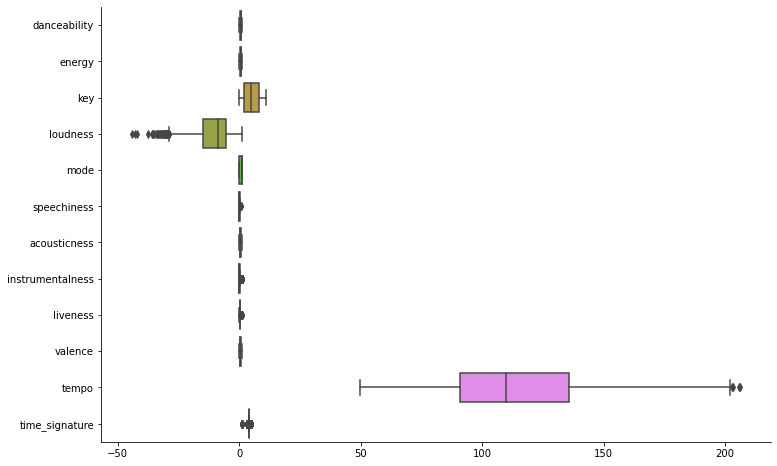

In [5]:
plt.subplots(figsize = (12, 8));
sns.boxplot(data = songs_1000_plot, orient = "h");
sns.despine();
plt.show()

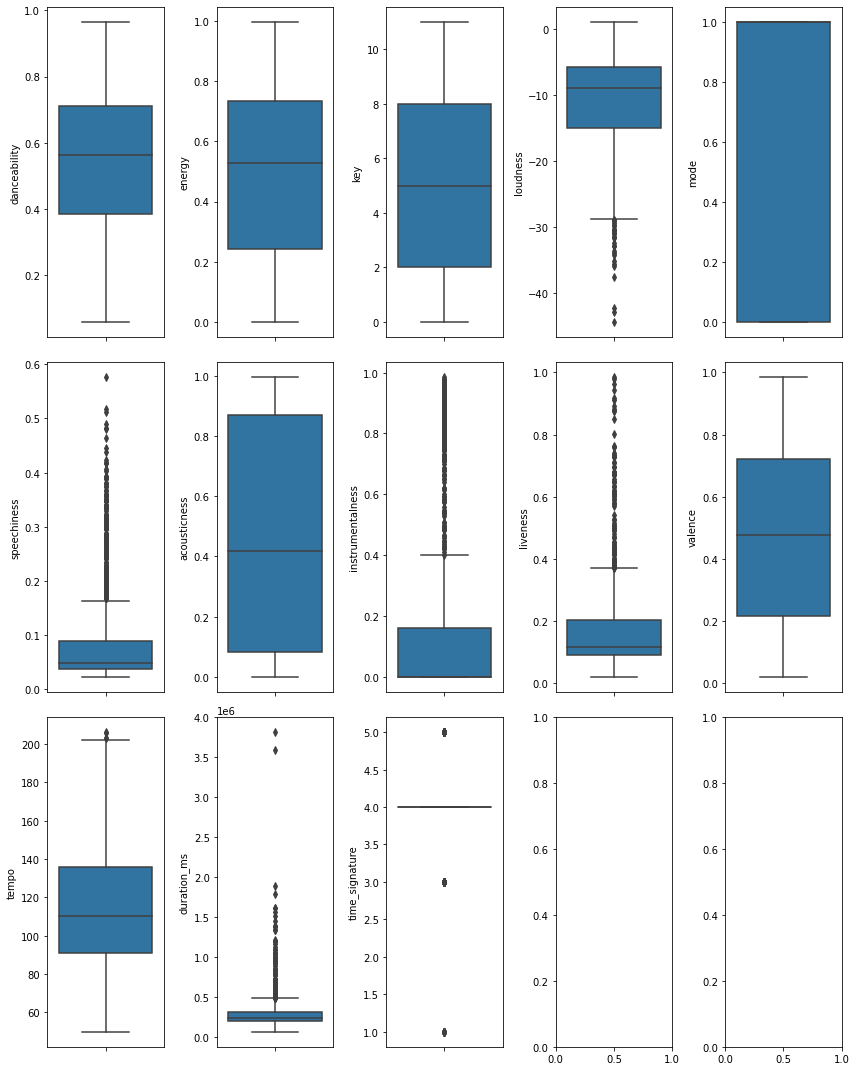

In [6]:
fig, axes = plt.subplots(3, 5, sharex = False, figsize = (12,15))
sns.boxplot(data = songs_1000, y = "danceability", orient = "v" , ax = axes[0, 0]);
sns.boxplot(data = songs_1000, y = "energy", orient = "v" , ax = axes[0, 1]);
sns.boxplot(data = songs_1000, y = "key", orient = "v" , ax = axes[0, 2]);
sns.boxplot(data = songs_1000, y = "loudness", orient = "v" , ax = axes[0, 3]);
sns.boxplot(data = songs_1000, y = "mode", orient = "v" , ax = axes[0, 4]);
sns.boxplot(data = songs_1000, y = "speechiness", orient = "v" , ax = axes[1, 0]);
sns.boxplot(data = songs_1000, y = "acousticness", orient = "v" , ax = axes[1, 1]);
sns.boxplot(data = songs_1000, y = "instrumentalness", orient = "v" , ax = axes[1, 2]);
sns.boxplot(data = songs_1000, y = "liveness", orient = "v" , ax = axes[1, 3]);
sns.boxplot(data = songs_1000, y = "valence", orient = "v" , ax = axes[1, 4]);
sns.boxplot(data = songs_1000, y = "tempo", orient = "v" , ax = axes[2, 0]);
sns.boxplot(data = songs_1000, y = "duration_ms", orient = "v" , ax = axes[2, 1]);
sns.boxplot(data = songs_1000, y = "time_signature", orient = "v" , ax = axes[2, 2]);
plt.tight_layout();
plt.show()

In [8]:
# 2. initialize the transformer (optionally, set parameters)
min_max = MinMaxScaler(feature_range = (0,1))

In [9]:
# 3. fit the transformer to the data
min_max.fit(songs_1000)

MinMaxScaler()

In [10]:
# 4. use the transformer to transform the data
songs_scaled_minmax = min_max.transform(songs_1000)

In [70]:
# 5. reconvert the transformed data back to a DataFrame
songs_norm_minmax = pd.DataFrame(songs_scaled_minmax, index = songs_1000.index, columns = songs_1000.columns)
songs_norm_minmax.head(5)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.624060,0.469869,0.909091,0.708800,1.0,0.196816,0.884538,0.000006,0.127865,0.965817,0.156106,0.014474,0.75
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.580938,0.247977,0.090909,0.698907,1.0,0.030391,0.453814,0.000009,0.089495,0.591879,0.494567,0.042899,0.75
Smoke Gets In Your Eyes,The Platters,0.254755,0.227896,0.272727,0.689059,1.0,0.014291,0.947791,0.000081,0.618376,0.211726,0.412383,0.025189,0.75
"What'd I Say, Pt. 1 & 2",Ray Charles,0.531181,0.683728,0.363636,0.856565,1.0,0.049928,0.811245,0.000000,0.146531,0.802155,0.247063,0.065093,0.75
Dream A Little Dream Of Me,Ella Fitzgerald,0.437196,0.167654,0.000000,0.676903,1.0,0.091715,0.921687,0.000000,0.157938,0.398177,0.168742,0.032589,0.75


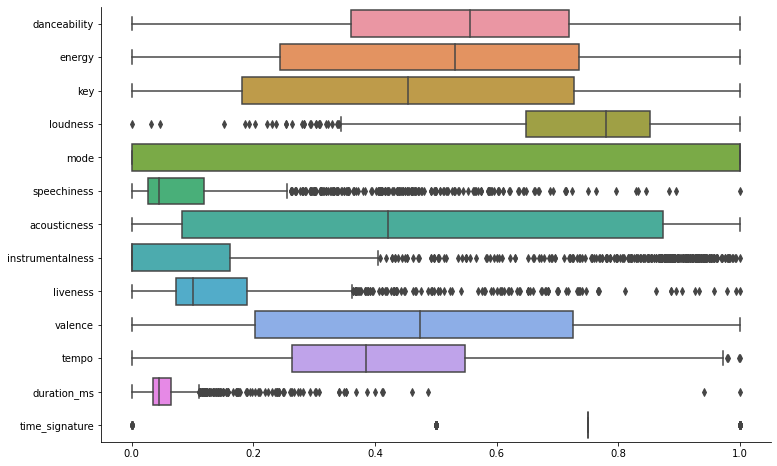

In [12]:
plt.subplots(figsize = (12, 8));
sns.boxplot(data = songs_norm_minmax, orient = "h");
sns.despine();
plt.show()

In [13]:
std = StandardScaler()

In [14]:
songs_scaled_std = std.fit_transform(songs_1000)

In [29]:
songs_norm_std = pd.DataFrame(songs_scaled_std, index = songs_1000.index, columns = songs_1000.columns)
songs_norm_std.head(5)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.388299,-0.093112,1.368799,-0.152503,0.712638,0.530704,1.098048,-0.560144,-0.208221,1.666362,-1.300917,-0.763678,0.247138
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.210312,-0.877303,-1.173788,-0.217004,0.712638,-0.537044,-0.047460,-0.560137,-0.461722,0.411614,0.376602,-0.295809,0.247138
Smoke Gets In Your Eyes,The Platters,-1.136000,-0.948270,-0.608769,-0.281218,0.712638,-0.640337,1.266269,-0.559927,3.032485,-0.863989,-0.030729,-0.587315,0.247138
"What'd I Say, Pt. 1 & 2",Ray Charles,0.004942,0.662692,-0.326259,0.810992,0.712638,-0.411700,0.903124,-0.560163,-0.084896,1.117192,-0.850106,0.069490,0.247138
Dream A Little Dream Of Me,Ella Fitzgerald,-0.382978,-1.161173,-1.456298,-0.360482,0.712638,-0.143602,1.196844,-0.560163,-0.009531,-0.238353,-1.238292,-0.465506,0.247138


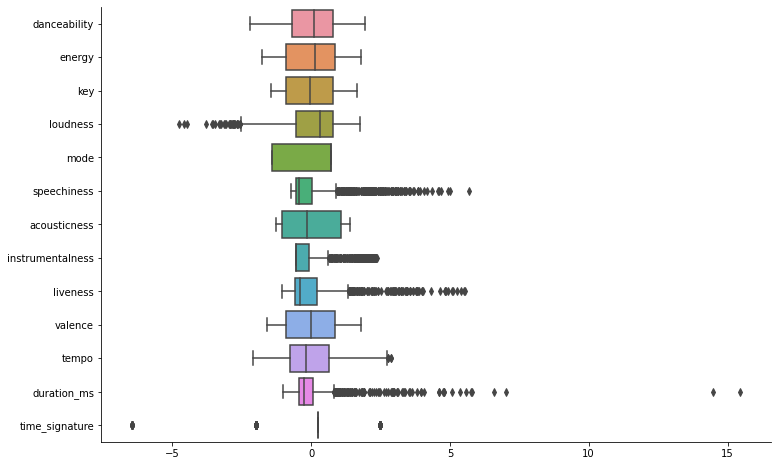

In [16]:
plt.subplots(figsize = (12, 8));
sns.boxplot(data = songs_norm_std, orient = "h");
sns.despine();
plt.show()

In [17]:
robust = RobustScaler()

In [18]:
songs_scaled_robust = robust.fit_transform(songs_1000)

In [28]:
songs_norm_robust = pd.DataFrame(songs_scaled_robust, index = songs_1000.index, columns = songs_1000.columns)
songs_norm_robust.head(5)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.191210,-0.125510,0.833333,-0.348378,0.0,1.661874,0.587618,-0.000755,0.231523,0.941118,-0.804729,-1.013770,0.0
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.070933,-0.576531,-0.666667,-0.397027,0.0,-0.162618,0.041973,-0.000740,-0.097952,0.226620,0.384585,-0.086380,0.0
Smoke Gets In Your Eyes,The Platters,-0.838859,-0.617347,-0.333333,-0.445459,0.0,-0.339118,0.667748,-0.000297,4.443455,-0.499753,0.095798,-0.664191,0.0
"What'd I Say, Pt. 1 & 2",Ray Charles,-0.067849,0.309184,-0.166667,0.378324,0.0,0.051562,0.494769,-0.000795,0.391808,0.628402,-0.485117,0.637702,0.0
Dream A Little Dream Of Me,Ella Fitzgerald,-0.329992,-0.739796,-0.833333,-0.505243,0.0,0.509668,0.634678,-0.000795,0.489760,-0.143493,-0.760330,-0.422746,0.0


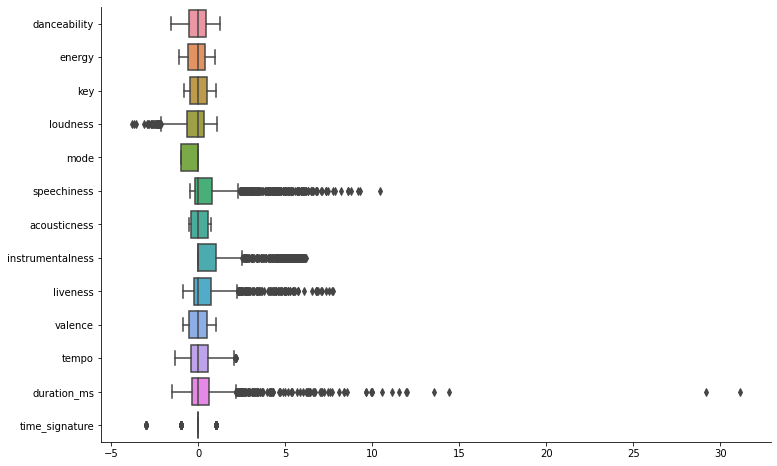

In [20]:
plt.subplots(figsize = (12, 8));
sns.boxplot(data = songs_norm_robust, orient = "h");
sns.despine();
plt.show()

In [21]:
qt = QuantileTransformer()

In [22]:
songs_scaled_qt = qt.fit_transform(songs_1000)

In [23]:
songs_norm_qt = pd.DataFrame(songs_scaled_qt, index = songs_1000.index, columns = songs_1000.columns)
songs_norm_qt.sample(5)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Woah,Lil Baby,0.962963,0.586497,1.000000,0.761257,1.0,0.911781,0.124553,0.000000,0.714385,0.454454,0.811775,0.198861,0.545546
Rolling in the Deep,Adele,0.776276,0.797798,0.731732,0.806807,1.0,0.049550,0.309937,0.000000,0.029076,0.536537,0.451669,0.461449,0.545546
Fiebre (Prod. King DouDou),Bad Gyal,0.284284,0.738678,0.642142,0.697698,1.0,0.593594,0.418773,0.000000,0.774274,0.267617,0.357320,0.563565,0.545546
Drop It Like It's Hot,Snoop Dogg,0.969263,0.616400,0.174174,0.933944,1.0,0.899900,0.344845,0.000000,0.352853,0.707207,0.264211,0.645475,0.545546
"Symphony No. 1 in A Flat Major, Op. 55: 1. Andante. Nobilmente e semplice - Allegro",Edward Elgar,0.020306,0.132633,0.731732,0.120273,1.0,0.255756,0.890891,0.897727,0.514515,0.095452,0.135112,0.989198,1.000000


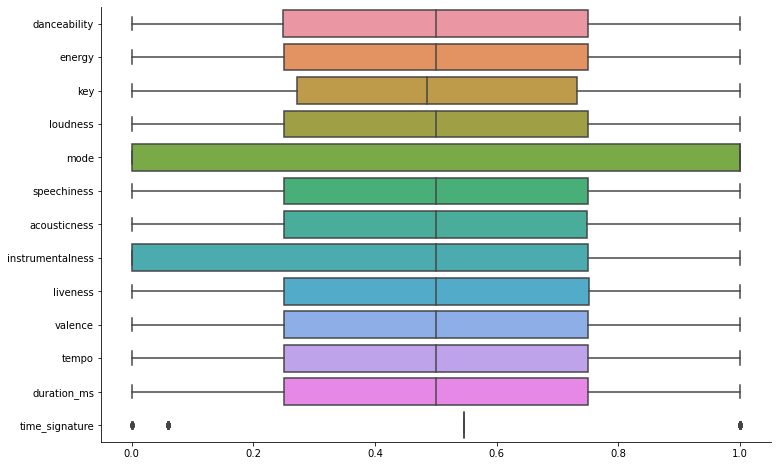

In [24]:
plt.subplots(figsize = (12, 8));
sns.boxplot(data = songs_norm_qt, orient = "h");
sns.despine();
plt.show()

In [64]:
col_trans = make_column_transformer(
            (std, ["danceability", "energy", "key", "acousticness", "valence", "tempo"]),
            (robust, ["loudness", "speechiness", "instrumentalness", "liveness", "duration_ms"]),
            (min_max, ["mode", "time_signature"]),
            remainder = "passthrough")  

In [80]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['danceability', 'energy', 'key',
                                  'acousticness', 'valence', 'tempo']),
                                ('robustscaler', RobustScaler(),
                                 ['loudness', 'speechiness', 'instrumentalness',
                                  'liveness', 'duration_ms']),
                                ('minmaxscaler', MinMaxScaler(),
                                 ['mode', 'time_signature'])])

In [66]:
songs_scaled = col_trans.fit_transform(songs_1000)

In [69]:
songs_norm = pd.DataFrame(songs_scaled, index = songs_1000.index)
songs_norm.columns = ["danceability", "energy", "key", "acousticness", "valence", "tempo", "loudness", 
                      "speechiness", "instrumentalness", "liveness", "duration_ms", "mode", "time_signature"]
songs_norm.head(5)

,,danceability,energy,key,acousticness,valence,tempo,loudness,speechiness,instrumentalness,liveness,duration_ms,mode,time_signature
name,artist,,,,,,,,,,,,,
All Shook Up,Elvis Presley,0.388299,-0.093112,1.368799,1.098048,1.666362,-1.300917,-0.348378,1.661874,-0.000755,0.231523,-1.013770,1.0,0.75
I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.210312,-0.877303,-1.173788,-0.047460,0.411614,0.376602,-0.397027,-0.162618,-0.000740,-0.097952,-0.086380,1.0,0.75
Smoke Gets In Your Eyes,The Platters,-1.136000,-0.948270,-0.608769,1.266269,-0.863989,-0.030729,-0.445459,-0.339118,-0.000297,4.443455,-0.664191,1.0,0.75
"What'd I Say, Pt. 1 & 2",Ray Charles,0.004942,0.662692,-0.326259,0.903124,1.117192,-0.850106,0.378324,0.051562,-0.000795,0.391808,0.637702,1.0,0.75
Dream A Little Dream Of Me,Ella Fitzgerald,-0.382978,-1.161173,-1.456298,1.196844,-0.238353,-1.238292,-0.505243,0.509668,-0.000795,0.489760,-0.422746,1.0,0.75


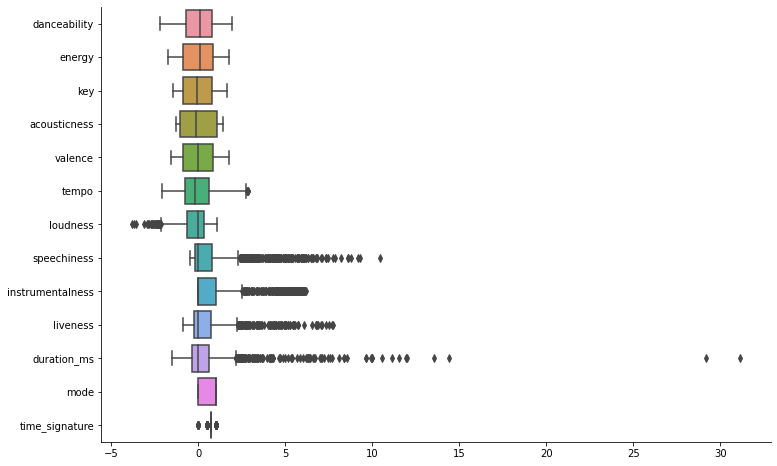

In [71]:
plt.subplots(figsize = (12, 8));
sns.boxplot(data = songs_norm, orient = "h");
sns.despine();
plt.show()

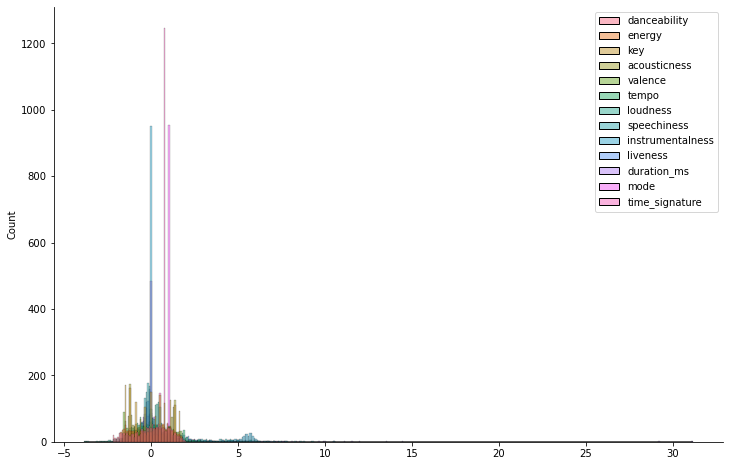

In [77]:
plt.subplots(figsize = (12, 8));
sns.histplot(data = songs_norm);
sns.despine();
plt.show()

In [79]:
songs_norm.to_csv("audio_features_scaled_1000.csv")